# Problem Statement

The goal of this project is to build a Deep Learning (ANN) model that predicts whether a customer will purchase a house or not. The dataset contains information about the property (size, price, type), customer financial details (salary, expenses, loan), and neighbourhood features (ratings, connectivity). Using these inputs, the model will learn patterns and classify the final decision as either Yes (1) or No (0).
This helps real-estate companies understand customer behavior and make better marketing and sales decisions.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('../data/global_house_purchase_dataset.csv')
df.head()

,property_id,country,city,property_type,furnishing_status,property_size_sqft,price,constructed_year,previous_owners,rooms,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
0,1,France,Marseille,Farmhouse,Semi-Furnished,991,412935,1989,6,6,...,10745,193949,15,6545,218986,0.16,1,5,6,0
1,2,South Africa,Cape Town,Apartment,Semi-Furnished,1244,224538,1990,4,8,...,16970,181465,20,8605,43073,0.08,9,1,2,0
2,3,South Africa,Johannesburg,Farmhouse,Semi-Furnished,4152,745104,2019,5,2,...,21914,307953,30,2510,437151,0.09,6,8,1,0
3,4,Germany,Frankfurt,Farmhouse,Semi-Furnished,3714,1110959,2008,1,3,...,17980,674720,15,8805,436239,0.33,2,6,6,0
4,5,South Africa,Johannesburg,Townhouse,Fully-Furnished,531,99041,2007,6,3,...,17676,65833,25,8965,33208,0.03,3,3,4,0


# Column Description

### property_id – Unique ID of each property
### country – Country where the property is located
### city – City of the property
### property_type – Type of property (Apartment, Townhouse, etc.)
### furnishing_status – Whether the property is Furnished, Semi-Furnished, or Unfurnished
### property_size_sqft – Size of the property in square feet
### price – Price of the property
### constructed_year – Year the property was built
### previous_owners – Number of previous owners
### rooms – Number of rooms
### bathrooms – Number of bathrooms
### garage – Garage available (1 = Yes, 0 = No)
### garden – Garden available (1 = Yes, 0 = No)
### crime_cases_reported – Crime cases reported in that area
### legal_cases_on_property – Legal issues on the property (1 = Yes, 0 = No)
### customer_salary – Customer’s monthly salary
### loan_amount – Loan amount the customer applied for
### loan_tenure_years – Loan duration in years
### monthly_expenses – Customer’s monthly expenses
### down_payment – Amount the customer can pay upfront
### emi_to_income_ratio – EMI-to-income ratio of the customer
### satisfaction_score – Customer’s satisfaction rating
### neighbourhood_rating – Rating of the locality
### connectivity_score – Transport and connectivity score
### decision – Purchase decision (1 = Yes, 0 = No)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   property_id              200000 non-null  int64  
 1   country                  200000 non-null  object 
 2   city                     200000 non-null  object 
 3   property_type            200000 non-null  object 
 4   furnishing_status        200000 non-null  object 
 5   property_size_sqft       200000 non-null  int64  
 6   price                    200000 non-null  int64  
 7   constructed_year         200000 non-null  int64  
 8   previous_owners          200000 non-null  int64  
 9   rooms                    200000 non-null  int64  
 10  bathrooms                200000 non-null  int64  
 11  garage                   200000 non-null  int64  
 12  garden                   200000 non-null  int64  
 13  crime_cases_reported     200000 non-null  int64  
 14  lega

In [4]:
df.columns

Index(['property_id', 'country', 'city', 'property_type', 'furnishing_status',
       'property_size_sqft', 'price', 'constructed_year', 'previous_owners',
       'rooms', 'bathrooms', 'garage', 'garden', 'crime_cases_reported',
       'legal_cases_on_property', 'customer_salary', 'loan_amount',
       'loan_tenure_years', 'monthly_expenses', 'down_payment',
       'emi_to_income_ratio', 'satisfaction_score', 'neighbourhood_rating',
       'connectivity_score', 'decision'],
      dtype='object')

In [13]:
df.describe()

c:\Users\chara\OneDrive\Desktop\Projects\HouseBuyNet _A_Deep_Learning_Decision_System\henv\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\chara\OneDrive\Desktop\Projects\HouseBuyNet _A_Deep_Learning_Decision_System\henv\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\chara\OneDrive\Desktop\Projects\HouseBuyNet _A_Deep_Learning_Decision_System\henv\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\chara\OneDrive\Desktop\Projects\HouseBuyNet _A_Deep_Learning_Decision_System\henv\Lib\site-packages\numpy\lib\_function_base_impl.py:4859: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
c:\Users\chara\OneDrive\Desktop\

,property_id,property_size_sqft,price,constructed_year,previous_owners,rooms,bathrooms,garage,garden,crime_cases_reported,...,customer_salary,loan_amount,loan_tenure_years,monthly_expenses,down_payment,emi_to_income_ratio,satisfaction_score,neighbourhood_rating,connectivity_score,decision
count,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,2.000000e+05,200000.000000,200000.000000,2.000000e+05,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,100000.500000,3195.736510,1.192150e+06,1991.486815,3.001370,4.513855,2.743730,0.499350,0.500215,1.161095,...,46531.009580,7.412495e+05,19.986375,10583.581975,4.419293e+05,0.180101,5.498650,5.505240,5.495615,0.230340
std,56921.061128,1590.412451,7.533453e+05,18.192296,2.002198,2.295669,1.798428,0.500001,0.500001,1.018223,...,27529.061641,4.908011e+05,7.081080,5312.197213,3.187923e+05,0.158146,2.875361,2.870945,2.870206,0.421052
min,10001.000000,682.000000,2.102520e+05,1963.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,8780.000000,1.245830e+05,10.000000,2580.000000,6.602000e+04,0.020000,1.000000,1.000000,1.000000,0.000000
25%,50000.750000,1802.000000,5.659895e+05,1975.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,...,21450.000000,3.372802e+05,15.000000,5770.000000,1.849592e+05,0.070000,3.000000,3.000000,3.000000,0.000000
50%,100000.500000,3190.000000,1.023429e+06,1991.000000,3.000000,5.000000,2.000000,0.000000,1.000000,1.000000,...,41465.000000,6.269325e+05,20.000000,10520.000000,3.561700e+05,0.130000,5.000000,5.000000,5.000000,0.000000
75%,150000.250000,4589.000000,1.725556e+06,2008.000000,5.000000,7.000000,4.000000,1.000000,1.000000,2.000000,...,70805.000000,1.058416e+06,25.000000,15260.000000,6.257352e+05,0.240000,8.000000,8.000000,8.000000,0.000000
max,190000.000000,5720.000000,2.807338e+06,2020.000000,6.000000,8.000000,7.000000,1.000000,1.000000,3.000000,...,94180.000000,1.826092e+06,30.000000,19065.000000,1.182209e+06,0.610000,10.000000,10.000000,10.000000,1.000000


In [5]:
df.isnull().sum()

property_id                0
country                    0
city                       0
property_type              0
furnishing_status          0
property_size_sqft         0
price                      0
constructed_year           0
previous_owners            0
rooms                      0
bathrooms                  0
garage                     0
garden                     0
crime_cases_reported       0
legal_cases_on_property    0
customer_salary            0
loan_amount                0
loan_tenure_years          0
monthly_expenses           0
down_payment               0
emi_to_income_ratio        0
satisfaction_score         0
neighbourhood_rating       0
connectivity_score         0
decision                   0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
num_cols = df.select_dtypes(exclude='object').columns
cat_cols = df.select_dtypes(include='object').columns

In [11]:
df['crime_cases_reported'].value_counts()

crime_cases_reported
1    69217
0    62909
2    40620
3    27254
Name: count, dtype: int64

In [12]:
df['decision'].value_counts()

decision
0    153932
1     46068
Name: count, dtype: int64

# Checking the Outliers

<Axes: >

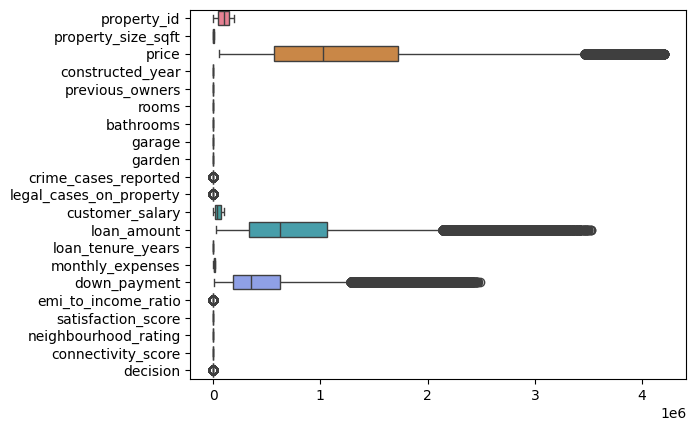

In [8]:
sns.boxplot(df,orient='h')

# Winsorization technique to handle the outliers

In [9]:
from scipy.stats.mstats import winsorize


for col in num_cols:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])


<Axes: >

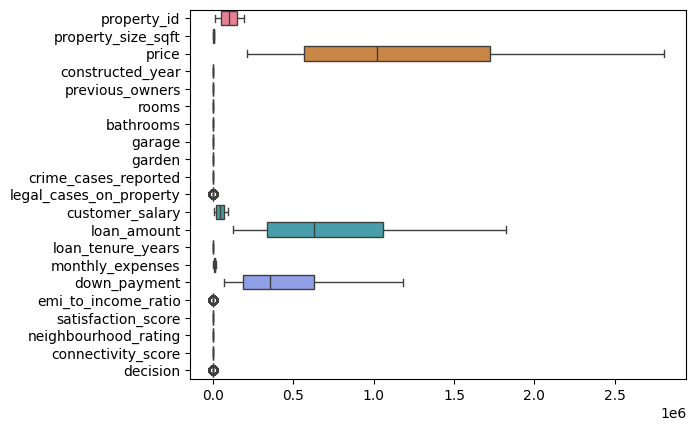

In [10]:
sns.boxplot(df,orient='h')

In [17]:
num_col = df.select_dtypes(exclude='object')

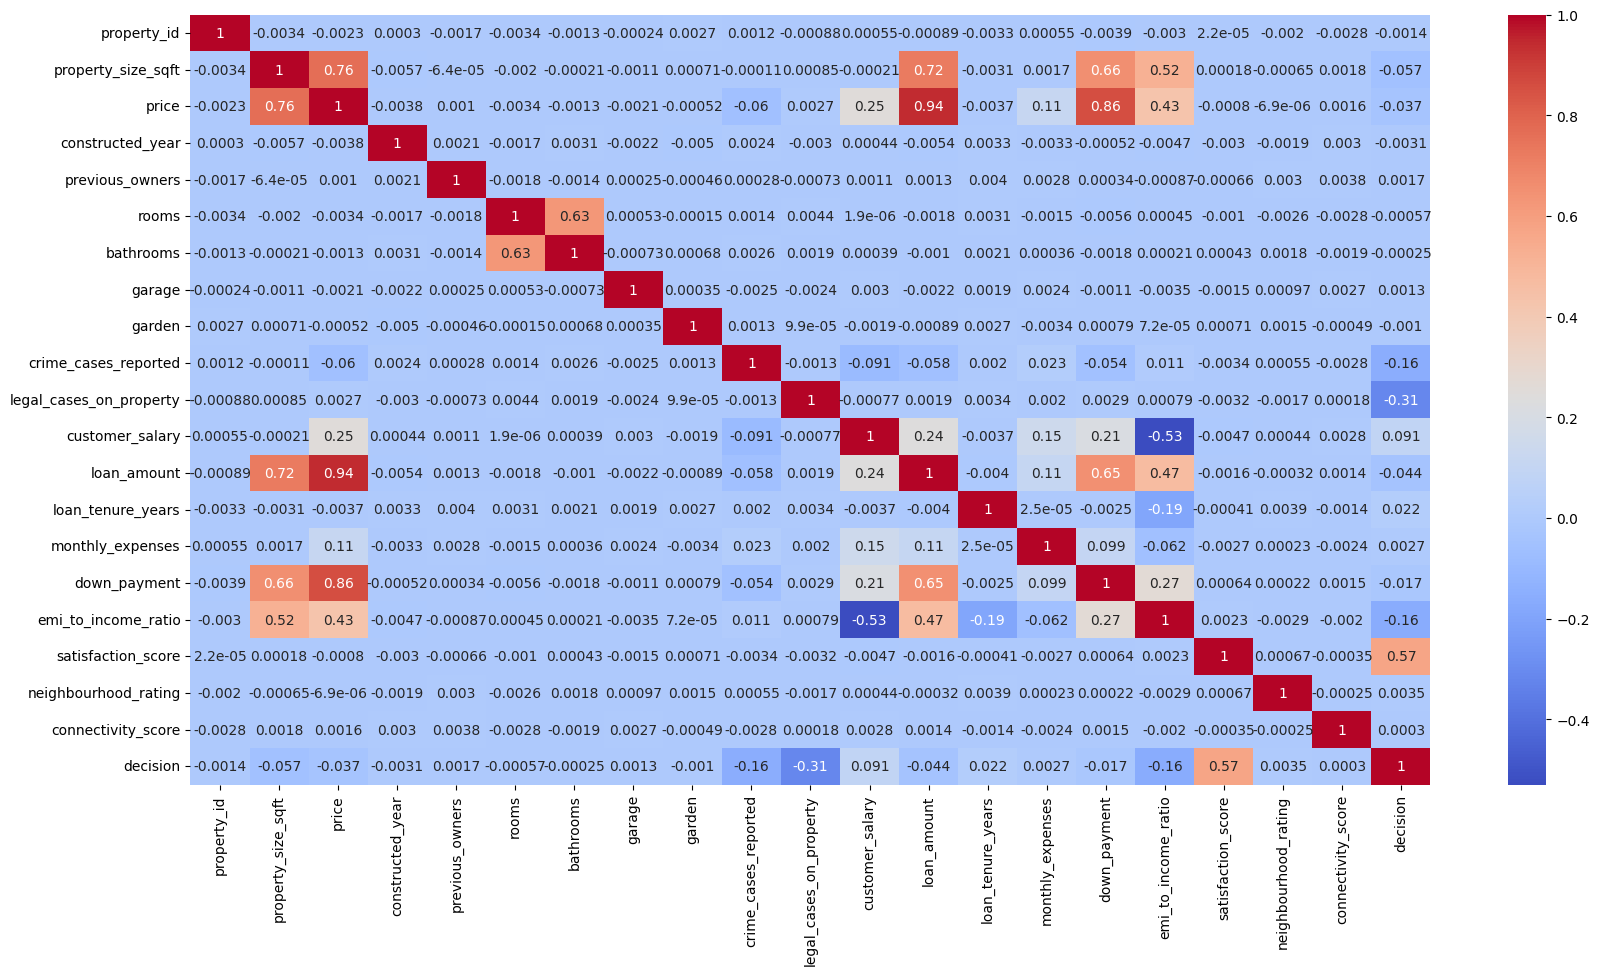

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(num_col.corr(), annot=True, cmap='coolwarm')
plt.show()

# Data Splitting 

In [20]:
y = df['decision']
x = df.drop(columns=['decision','property_id'])

In [21]:
from sklearn.model_selection import  train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessing = ColumnTransformer(transformers=[('num_preprocessing',StandardScaler(),num_cols),('cat_preprocessing',OneHotEncoder(handle_unknown="ignore"),cat_cols)])



In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier


def build_ann():
    model = Sequential()
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

ModuleNotFoundError: No module named 'scikeras'